In [28]:
# downloading images

from bing_image_downloader import downloader

downloader.download(
    query='terror dark evil shadow',
    output_dir='./images',
    limit=1000,
)

downloader.download(
    query='happy fun field picnic',
    output_dir='./images',
    limit=500,
)

downloader.download(
    query='random noise',
    output_dir='./images',
    limit=500
)

9e394a107b4c.JPG/:/rs=w:365,h:365,cg:true,m/cr=w:365,h:365

[%] Downloading Image #418 from https://thumbs.dreamstime.com/b/senior-couple-sitting-picnic-table-hike-portrait-128588722.jpg
[%] File Downloaded !

[%] Downloading Image #419 from https://thumbs.dreamstime.com/b/summer-weekend-concept-portrait-happy-group-friends-trendy-casual-clothing-drinking-red-wine-talking-having-fun-sunny-149524468.jpg
[%] File Downloaded !

[%] Downloading Image #420 from https://i1.wp.com/www.sillymamaquilts.com/wp-content/uploads/2016/03/DSCN9181.jpg?w=1024
[%] File Downloaded !

[%] Downloading Image #421 from https://i.pinimg.com/originals/7c/9f/62/7c9f625b42412763a8df15e9c813a9e2.jpg
[%] File Downloaded !

[%] Downloading Image #422 from https://i.ebayimg.com/images/g/dKoAAOSw0QFXCx~5/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #423 from http://thumb1.shutterstock.com/display_pic_with_logo/562825/116828260/stock-photo-young-couple-on-a-romantic-picnic-in-a-park-on-a-sunny-day-outdoors

KeyboardInterrupt: 

In [48]:
# loading downloaded images into 64x64 pixel grayscale images

from PIL import Image
from tqdm import tqdm

def square_image(im):
    (x, y) = im.size
    size = max(x, y)
    squared_im = Image.new('L', (size, size), (0))
    squared_im.paste(
        im,
        box=(
            int((size - x) / 2),
            int((size - y) / 2)
        )
    )
    return squared_im

def process_images(dir_name, pixels=64):
    processed = []
    i = 0
    for imagefile in tqdm(os.listdir(dir_name)):
        im = Image.open(dir_name + imagefile)
        im = im.convert('L')
        im = square_image(im)
        im = im.resize((pixels, pixels), Image.LANCZOS)
        processed.append(im)
        i += 1
    return processed

images_creepy = process_images('./images/terror dark evil shadow/')
images_not_creepy = process_images('./images/happy fun field picnic/') + process_images('./images/random noise/')

 24%|██▍       | 119/500 [00:00<00:02, 161.59it/s]C:\Users\Reign\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 31%|███       | 153/500 [00:01<00:03, 108.12it/s]C:\Users\Reign\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 51%|█████     | 256/500 [00:01<00:01, 156.00it/s]C:\Users\Reign\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 61%|██████    | 305/500 [00:02<00:01, 115.56it/s]C:\Users\Reign\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to R

In [77]:
# loading images into numpy and normalizing values from zero to one

import numpy as np

images = np.array([np.asarray(im).reshape(64, 64, 1) / 256 for im in (images_creepy + images_not_creepy)])
images_labels = np.array([1 for im in images_creepy] + [0 for im in images_not_creepy])

print(images.shape)
print(images_labels.shape)
print(images_labels)

(2004, 64, 64, 1)
(2004,)
[1 1 1 ... 0 0 0]


In [72]:
def plt_images(images, ncols=5):
    fig = plt.figure(figsize=(40, 40))
    nrows = int(len(images) / ncols) + 1
    for i in range(len(images)):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [85]:
# creating and training discriminator network

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

discriminator = models.Sequential()

discriminator.add(layers.Conv2D(
    filters=64,
    kernel_size=(9, 9),
    strides=(2, 2),
    input_shape=(64, 64, 1),
))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.5))

discriminator.add(layers.Conv2D(
    filters=128,
    kernel_size=(5, 5),
    strides=(1, 1),
))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.5))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1))

discriminator.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.SGD(learning_rate=1e-4, momentum=1e-4),
    metrics=['accuracy'],
)

discriminator.fit(
    x=images,
    y=images_labels,
    epochs=20,
    validation_split=0.3,
    shuffle=True,
)

Epoch 1/20
44/44 [==============================] - 1s 11ms/step - loss: 1.5761 - accuracy: 0.1748 - val_loss: 0.9713 - val_accuracy: 0.3588
Epoch 2/20
44/44 [==============================] - 0s 7ms/step - loss: 1.4039 - accuracy: 0.2126 - val_loss: 0.5282 - val_accuracy: 0.7741
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 1.0319 - accuracy: 0.1954 - val_loss: 0.8804 - val_accuracy: 0.3505
Epoch 4/20
44/44 [==============================] - 0s 7ms/step - loss: 0.9573 - accuracy: 0.2011 - val_loss: 0.8795 - val_accuracy: 0.3272
Epoch 5/20
44/44 [==============================] - 0s 7ms/step - loss: 0.8869 - accuracy: 0.2618 - val_loss: 0.8958 - val_accuracy: 0.2940
Epoch 6/20
44/44 [==============================] - 0s 7ms/step - loss: 0.8305 - accuracy: 0.3031 - val_loss: 0.8456 - val_accuracy: 0.3156
Epoch 7/20
44/44 [==============================] - 0s 7ms/step - loss: 0.7727 - accuracy: 0.3966 - val_loss: 0.9333 - val_accuracy: 0.1744
Epoch 8/20
44/44 [=

In [86]:
# Saving discriminator once it's satisfactory

discriminator.save('./models/discriminator')

INFO:tensorflow:Assets written to: ./models/discriminator\assets


Current epoch: 91.
Average time for last 10 epochs: 2.3838639736175535 seconds.


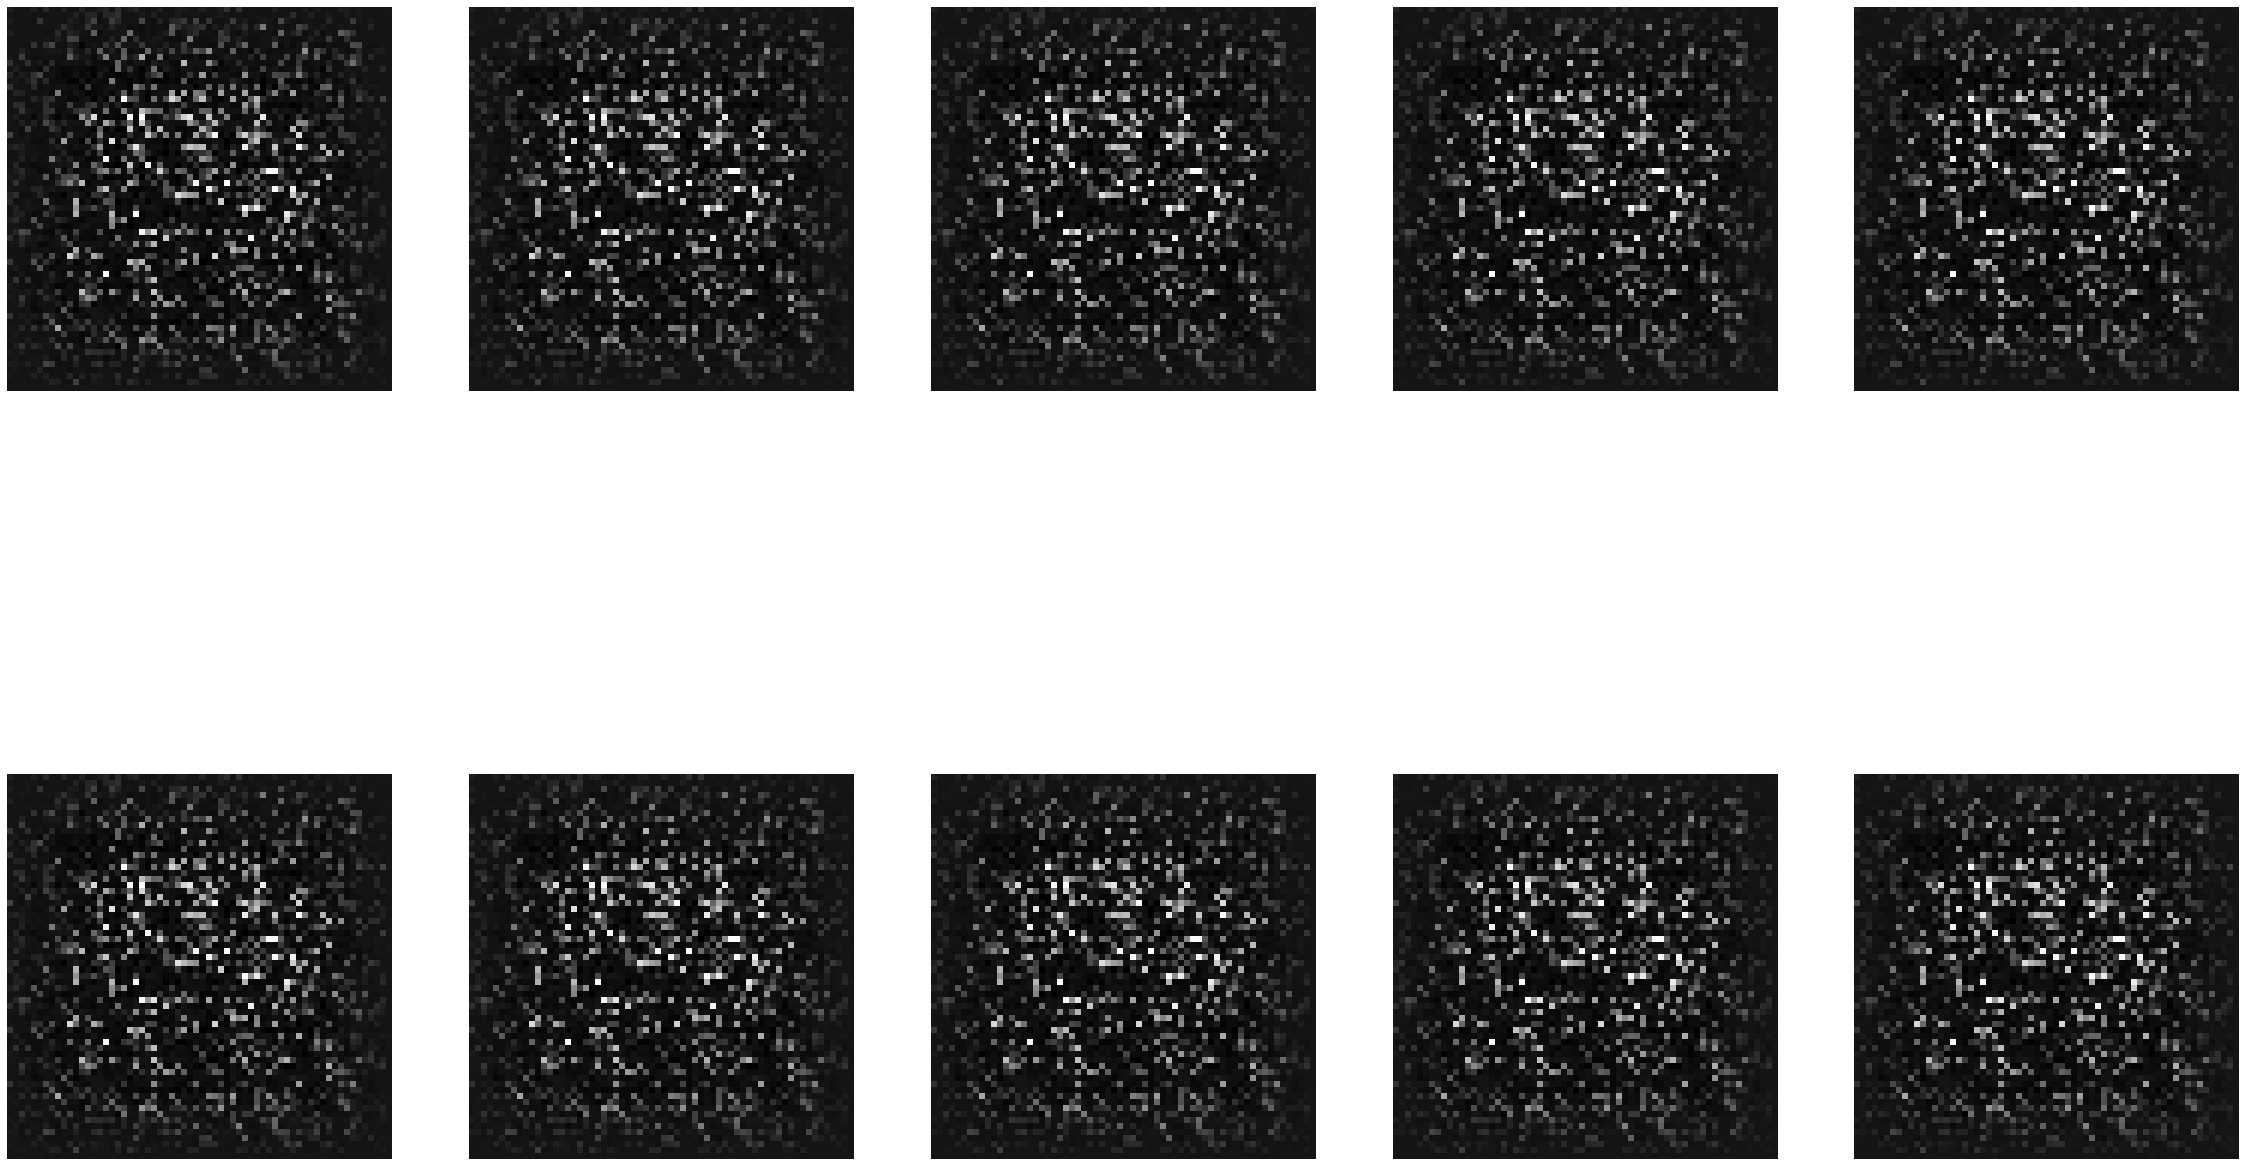

KeyboardInterrupt: 

In [97]:
# building and training generator model

discriminator = tf.keras.models.load_model('./models/discriminator')

generator = models.Sequential()

generator.add(layers.Dense(8*8*256))
generator.add(layers.Reshape((8, 8, 256)))

generator.add(layers.Conv2DTranspose(
    filters=128,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding='same',
    use_bias=False
))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(
    filters=64,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding='same',
    use_bias=False
))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(
    filters=1,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding='same',
    use_bias=False,
    activation='tanh'
))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

loss_fn = losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = optimizers.Adam()
def generator_loss(disc_output):
    return loss_fn(tf.ones_like(disc_output), disc_output)

@tf.function
def generator_train_step(size=100):
    seeds = tf.random.normal((size, 100))

    with tf.GradientTape() as gen_tape:
        gen_output = generator(seeds, training=True)
        disc_output = discriminator(gen_output, training=False)

        gen_loss = generator_loss(disc_output)
        gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))

from IPython import display
import time

clock = 0
results_every = 10
for epoch in range(100):
    time_start = time.time()

    for batch in range(100):
        generator_train_step(100)

    time_end = time.time()
    clock += time_end -time_start

    if epoch % results_every == 0:
        display.clear_output(wait=True)        
        print(f'Current epoch: {epoch + 1}.\nAverage time for last {results_every} epochs: {clock / results_every} seconds.')
        clock = 0
        example_seeds = tf.random.normal((10, 100))
        examples = generator(example_seeds, training=False)
        plt_images(examples)
example_seeds = tf.random.normal((10, 100))
examples = generator(example_seeds, training=False)
plt_images(examples)